In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2,3)] # select petal length & width
y = (iris.target ==0).astype(np.int) # Iris setosa

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [2]:
y_pred

array([1])

In [3]:
import matplotlib.pyplot as plt


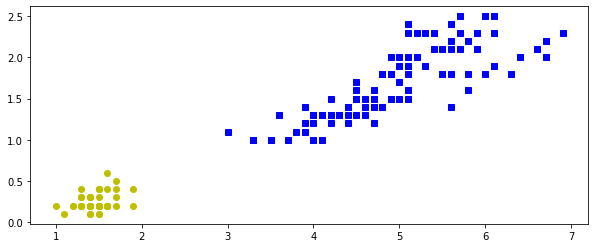

In [4]:
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

In [5]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.4.1'

In [6]:
keras.__version__

'2.4.0'

In [7]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [8]:
X_train_full.shape

(60000, 28, 28)

In [9]:
X_train_full.dtype

dtype('uint8')

In [10]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [12]:
class_names[y_train[0]]

'Coat'

In [13]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.17254902, 0.49803922, 0.71372549, 0.7254902 ,
        0.63137255, 0.47058824, 0.21568627, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.16470588,
        0.77647059, 0.98431373, 1.        , 0.98431373, 0.97647059,
        0.96862745, 1.    

In [14]:
# build neural network with 2 hidden layers
model = keras.models.Sequential() # Sequential Model (simplest of Keras model)
# can also set keras.layers.InputLayer
model.add(keras.layers.Flatten(input_shape=[28,28])) # first layer: convert img into 1D array
# Dense hidden layer w/ 300 neurs. Use ReLU activation function
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


In [15]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [16]:
# first layer has 784 x 300 connection weights + 300 bias terms (235500)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [17]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [18]:
model.layers

In [19]:
hidden1 = model.layers[1]

In [20]:
hidden1.name

'dense_3'

In [21]:
weights, biases = hidden1.get_weights()

In [22]:
weights

array([[-0.01799393, -0.01566144,  0.00867792, ...,  0.02165788,
         0.02880877, -0.05797598],
       [ 0.0495707 ,  0.03640613, -0.07079763, ...,  0.04520951,
         0.04506169,  0.04153097],
       [-0.06430025, -0.0250102 , -0.03008044, ..., -0.06167748,
         0.05819206, -0.01542842],
       ...,
       [ 0.01952288,  0.05281962,  0.00455221, ...,  0.00783644,
         0.07255007, -0.07078046],
       [-0.00797911, -0.01503019,  0.0194175 , ..., -0.02023831,
         0.00036897, -0.06422428],
       [ 0.04801165, -0.02860861, -0.04867455, ..., -0.01501532,
         0.05350287,  0.05701736]], dtype=float32)

In [23]:
weights.shape

(784, 300)

In [24]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [25]:
biases.shape

(300,)

In [26]:
# sparse_categorical_crossentropy - sparse labels (0-9 target class index)
# sgd - train using Stoichastic Gradient Descent
# thus Keras does backpropagation algorithm - reverse-model autodiff plus SGD
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [27]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 1.0134 - accuracy: 0.6696 - val_loss: 0.5122 - val_accuracy: 0.8320
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5067 - accuracy: 0.8258 - val_loss: 0.4614 - val_accuracy: 0.8444
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4495 - accuracy: 0.8424 - val_loss: 0.4179 - val_accuracy: 0.8628
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4178 - accuracy: 0.8552 - val_loss: 0.3977 - val_accuracy: 0.8624
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3887 - accuracy: 0.8632 - val_loss: 0.3879 - val_accuracy: 0.8710 - loss: 0.3781 -  - ETA: 1s - loss: 0.3836 - accuracy -
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3793 - accuracy: 0.8658 - val_loss: 0.3684 - val_accuracy: 0.8736
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.37

In [28]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [29]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


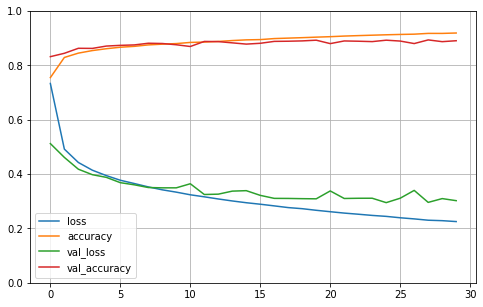

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [31]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 55.1234 - accuracy: 0.8620


[55.12336730957031, 0.8619999885559082]

In [32]:
X_new = X_test[:3]
y_prob = model.predict(X_new)
y_prob.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [33]:
# pred_classes (deprecated) or np argmax 
# to give highest estiamted probability

# y_pred = model.predict_classes(X_new)
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [34]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [35]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

In [36]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)


In [37]:
np.random.seed(42)
tf.random.set_seed(42)

In [38]:

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.2656 - val_loss: 0.8560
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7413 - val_loss: 0.6531
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6604 - val_loss: 0.6099
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6245 - val_loss: 0.5658
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5770 - val_loss: 0.5355
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5609 - val_loss: 0.5173
Epoch 7/20
363/363 [==============================] - 0s 985us/step - loss: 0.5500 - val_loss: 0.5081
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5200 - val_loss: 0.4799
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5051 - val_loss: 0.4690
Epoch 10/20
363/363 [==============================] - 0s 983us/step - loss: 0.4910 - val_loss: 0.

In [39]:
y_pred

array([[0.3885664],
       [1.6792021],
       [3.1022797]], dtype=float32)

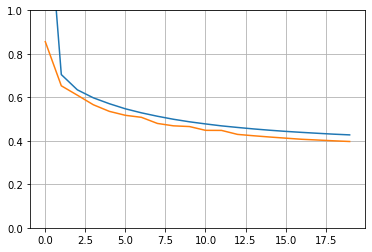

In [40]:
# plot test vs training data comparison
# they're about 1/2 epoch off in interval

plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [41]:
# wide & deep neural network

# input object
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
# concatenate input & output of second hidden layer
concat = keras.layers.Concatenate()([input_, hidden2])
# pass result of cancatenation
output = keras.layers.Dense(1)(concat)
# create Keras Model, specifying inputs and outputs
model = keras.Model(inputs=[input_], outputs=[output])

In [42]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 30)           930         dense_8[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_9[0][0]                

In [43]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)


Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 3.2566 - val_loss: 0.6913
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6795 - val_loss: 0.9454
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6284 - val_loss: 0.6622
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5929 - val_loss: 0.5284
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5452 - val_loss: 0.5004
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5313 - val_loss: 0.5894
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5207 - val_loss: 0.5889
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4938 - val_loss: 0.4690
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4789 - val_loss: 0.5305
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4728 - val_loss: 0.5466

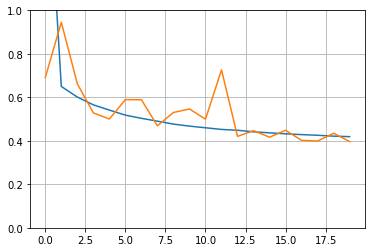

In [44]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [45]:
np.random.seed(42)
tf.random.set_seed(42)

In [46]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [47]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

# length 5 (A) & 6 (B)
# which matches shape in input A & B
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 3.1941 - val_loss: 0.8072
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7247 - val_loss: 0.6658
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6176 - val_loss: 0.5687
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5799 - val_loss: 0.5296
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5409 - val_loss: 0.4993
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5173 - val_loss: 0.4811
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5186 - val_loss: 0.4696
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4977 - val_loss: 0.4496
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4765 - val_loss: 0.4404
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4676 - val_loss: 0.4315

In [48]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [49]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))


In [50]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 3.2165 - main_output_loss: 3.0213 - aux_output_loss: 4.9724 - val_loss: 1.5430 - val_main_output_loss: 0.9144 - val_aux_output_loss: 7.2005
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 1.0694 - main_output_loss: 0.8370 - aux_output_loss: 3.1602 - val_loss: 1.3118 - val_main_output_loss: 0.6824 - val_aux_output_loss: 6.9755
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.8493 - main_output_loss: 0.6993 - aux_output_loss: 2.1995 - val_loss: 1.2622 - val_main_output_loss: 0.6458 - val_aux_output_loss: 6.8096
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7420 - main_output_loss: 0.6330 - aux_output_loss: 1.7228 - val_loss: 1.2022 - val_main_output_loss: 0.6136 - val_aux_output_loss: 6.5002
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6819 - main_output_loss: 0.5849 - aux_output_loss: 1.5553 - val_loss

In [51]:
total_loss, main_loss, aux_loss = model.evaluate(
[X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 1ms/step - loss: 0.4822 - main_output_loss: 0.4278 - aux_output_loss: 0.9714


In [52]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

In [53]:
y_pred_main

array([[0.3289803],
       [1.8843516],
       [3.3908253]], dtype=float32)

In [54]:
# subclass api to build model
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # handles standard args (e.g., name)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel()

In [55]:
# save & load a trained model
# model.save("my_keras_model.h5")
# model = keras.models.load_model("my_keras_model.h5")

In [56]:
# callbacks to save at reguar intervals
# checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
# history = model.fit(X_train, y_train, epochs=10, callbacks=
# [checkpoint_cb])

In [57]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [58]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [59]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
# rollback to best model
model = keras.models.load_model("my_keras_model.h5") 
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 3.3697 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6964 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6167 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5846 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5321 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5083 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5044 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4813 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4627 - val_loss: 0.4413
Epoch 10/10
162/162 [==============================] - 0s 606us/step - loss: 0.4382


In [60]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4578 - val_loss: 0.4110
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4430 - val_loss: 0.4266
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4376 - val_loss: 0.3996
Epoch 4/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4361 - val_loss: 0.3939
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4204 - val_loss: 0.3889
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4112 - val_loss: 0.3866
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4226 - val_loss: 0.3860
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4135 - val_loss: 0.3793
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4039 - val_loss: 0.3746
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4023 - val_lo

363/363 [==============================] - 0s 1ms/step - loss: 0.3297 - val_loss: 0.3274
Epoch 82/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3441 - val_loss: 0.3167
Epoch 83/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3369 - val_loss: 0.3280
Epoch 84/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3182 - val_loss: 0.3634
Epoch 85/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3235 - val_loss: 0.3176
Epoch 86/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3184 - val_loss: 0.3156
Epoch 87/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3395 - val_loss: 0.3529
Epoch 88/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3264 - val_loss: 0.3258
Epoch 89/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3210 - val_loss: 0.3630
Epoch 90/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3192 - val_loss: 

In [61]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

In [62]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [63]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [64]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))


In [65]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 2s 6ms/step - loss: 3.3697 - val_loss: 0.7126
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: 0.6964 - val_loss: 0.6880
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: 0.6167 - val_loss: 0.5803
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5846 - val_loss: 0.5166
Epoch 5/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5321 - val_loss: 0.4895
Epoch 6/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5083 - val_loss: 0.4951
Epoch 7/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5044 - val_loss: 0.4861
Epoch 8/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4813 - val_loss: 0.4554
Epoch 9/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4627 - val_loss: 0.4413
Epoch 10/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4549 - val_loss: 0.4379

In [66]:
# Run: tensorboard --logdir=./my_logs --port=6006

In [67]:
run_logdir2 = get_run_logdir()
run_logdir2

'.\\my_logs\\run_2021_03_30-21_56_23'

In [68]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [69]:
# model with diff learning rate
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.05))

In [70]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 2s 6ms/step - loss: 0.7645 - val_loss: 302.8536
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: 8159520618.2209 - val_loss: 1.3230
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: 1.3439 - val_loss: 1.3176
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: 1.3546 - val_loss: 1.3261
Epoch 5/30
363/363 [==============================] - 0s 1ms/step - loss: 1.3513 - val_loss: 1.3154
Epoch 6/30
363/363 [==============================] - 0s 1ms/step - loss: 1.3274 - val_loss: 1.3203
Epoch 7/30
363/363 [==============================] - 0s 1ms/step - loss: 1.3639 - val_loss: 1.3149
Epoch 8/30
363/363 [==============================] - 0s 1ms/step - loss: 1.3487 - val_loss: 1.3157
Epoch 9/30
363/363 [==============================] - 0s 1ms/step - loss: 1.3445 - val_loss: 1.3150
Epoch 10/30
363/363 [==============================] - 0s 1ms/step - loss: 1.3697 - val_l

In [71]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [72]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [73]:
keras_reg.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), 
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

Epoch 1/100
363/363 [==============================] - 2s 3ms/step - loss: 1.8887 - val_loss: 10.5492
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.9724 - val_loss: 0.5672
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5460 - val_loss: 0.4875
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5080 - val_loss: 0.4654
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4745 - val_loss: 0.4563
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4489 - val_loss: 0.4691
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4608 - val_loss: 0.4507
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4390 - val_loss: 0.4346
Epoch 9/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4270 - val_loss: 0.4450
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4237 - val_l

In [74]:
# print(mse_test)

-0.3566841185092926


In [90]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100)               .tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2)      .rvs(1000).tolist(),
}

In [91]:
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10,cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 1.6483 - val_loss: 5.1557
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5594 - val_loss: 0.5296
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4745 - val_loss: 3.7910
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4558 - val_loss: 39.2703
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5196 - val_loss: 185.7293
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 3.2191 - val_loss: 3.7338
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.8607 - val_loss: 660.4578
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 13.5879 - val_loss: 0.3848
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4367 - val_loss: 0.3630
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 1.2181 - 

242/242 [==============================] - 0s 1ms/step - loss: 0.5525 - val_loss: 0.6349
Epoch 22/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5465 - val_loss: 0.8120
Epoch 23/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5674 - val_loss: 0.8051
Epoch 24/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5494 - val_loss: 0.7874
Epoch 25/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5611 - val_loss: 0.6789
Epoch 26/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5348 - val_loss: 0.5677
Epoch 27/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5536 - val_loss: 0.8559
Epoch 28/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5519 - val_loss: 0.5688
Epoch 29/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5586 - val_loss: 0.7242
Epoch 30/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5428 - val_loss: 

242/242 [==============================] - 0s 2ms/step - loss: 0.5366 - val_loss: 0.4665
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4803 - val_loss: 0.4308
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4394 - val_loss: 0.4266
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4262 - val_loss: 0.3982
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4064 - val_loss: 0.4098
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3875 - val_loss: 0.4003
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3844 - val_loss: 0.4010
Epoch 11/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3647 - val_loss: 0.3771
Epoch 12/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3488 - val_loss: 0.3749
Epoch 13/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3743 - val_loss: 0.398

242/242 [==============================] - 1s 2ms/step - loss: 0.2970 - val_loss: 0.3632
Epoch 42/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3059 - val_loss: 0.4231
Epoch 43/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3178 - val_loss: 0.3436
Epoch 44/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3254 - val_loss: 0.4581
Epoch 45/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3056 - val_loss: 0.3069
Epoch 46/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3036 - val_loss: 0.4151
Epoch 47/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3067 - val_loss: 0.3228
Epoch 48/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3017 - val_loss: 0.3372
Epoch 49/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3104 - val_loss: 0.4176
Epoch 50/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3068 - val_loss: 

Epoch 22/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4349 - val_loss: 0.4259
Epoch 23/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4474 - val_loss: 0.4167
Epoch 24/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4305 - val_loss: 0.4219
Epoch 25/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4429 - val_loss: 0.4138
Epoch 26/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4268 - val_loss: 0.4136
Epoch 27/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4457 - val_loss: 0.4072
Epoch 28/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4361 - val_loss: 0.4056
Epoch 29/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4372 - val_loss: 0.4090
Epoch 30/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4272 - val_loss: 0.4158
Epoch 31/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4186

Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.9994 - val_loss: 0.8862
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7284 - val_loss: 0.6484
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6445 - val_loss: 0.5858
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5951 - val_loss: 0.6210
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5579 - val_loss: 0.5397
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5449 - val_loss: 0.5027
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5443 - val_loss: 0.4836
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5212 - val_loss: 0.5105
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4971 - val_loss: 0.4809
Epoch 11/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5130 - val_l

242/242 [==============================] - 1s 3ms/step - loss: 0.3423 - val_loss: 0.3618
Epoch 29/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3396 - val_loss: 0.3552
Epoch 30/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3369 - val_loss: 0.3334
Epoch 31/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3352 - val_loss: 0.3296
Epoch 32/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3262 - val_loss: 0.3259
Epoch 33/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3270 - val_loss: 0.3460
Epoch 34/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3225 - val_loss: 0.3507
Epoch 35/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3253 - val_loss: 0.3213
Epoch 36/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3230 - val_loss: 0.3537
Epoch 37/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3212 - val_loss: 

Epoch 13/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3506 - val_loss: 0.6752
Epoch 14/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3404 - val_loss: 0.6284
Epoch 15/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3654 - val_loss: 0.6078
Epoch 16/100
121/121 [==============================] - 0s 971us/step - loss: 0.3667
Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 1.8751 - val_loss: 1.5162
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5599 - val_loss: 9.0229
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5018 - val_loss: 7.8586
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5995 - val_loss: 1.0625
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4054 - val_loss: 0.5701
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3793 - val_loss: 0.5088
Epo

242/242 [==============================] - 0s 2ms/step - loss: 0.6071 - val_loss: 9.2874
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5930 - val_loss: 11.4397
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5688 - val_loss: 13.0991
Epoch 11/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5623 - val_loss: 14.8188
Epoch 12/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5419 - val_loss: 16.2545
Epoch 13/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5422 - val_loss: 17.4981
Epoch 14/100
121/121 [==============================] - 0s 924us/step - loss: 0.9629
Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 4.6993 - val_loss: 5.5735
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 1.1838 - val_loss: 0.8289
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.8059 - val_loss: 0.7539
Epoch 4/1

242/242 [==============================] - 0s 2ms/step - loss: 0.3635 - val_loss: 0.3485
Epoch 36/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3609 - val_loss: 0.4470
Epoch 37/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3617 - val_loss: 0.3752
Epoch 38/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3667 - val_loss: 0.5443
Epoch 39/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3620 - val_loss: 0.3548
Epoch 40/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3473 - val_loss: 0.4429
Epoch 41/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3557 - val_loss: 0.3523
Epoch 42/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3578 - val_loss: 0.3462
Epoch 43/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3574 - val_loss: 0.3437
Epoch 44/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3561 - val_loss: 

242/242 [==============================] - 0s 2ms/step - loss: 0.3834 - val_loss: 0.3685
Epoch 31/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3714 - val_loss: 0.3638
Epoch 32/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3975 - val_loss: 0.3983
Epoch 33/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3788 - val_loss: 0.3737
Epoch 34/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3662 - val_loss: 0.4105
Epoch 35/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3664 - val_loss: 0.3607
Epoch 36/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3659 - val_loss: 0.3588
Epoch 37/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3738 - val_loss: 0.3543
Epoch 38/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3670 - val_loss: 0.3939
Epoch 39/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3808 - val_loss: 

242/242 [==============================] - 0s 2ms/step - loss: 0.3733 - val_loss: 0.3793
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3588 - val_loss: 0.3397
Epoch 11/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3347 - val_loss: 0.3442
Epoch 12/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3235 - val_loss: 0.3508
Epoch 13/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3600 - val_loss: 0.3451
Epoch 14/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3300 - val_loss: 0.3348
Epoch 15/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3234 - val_loss: 0.3305
Epoch 16/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3228 - val_loss: 0.3403
Epoch 17/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3299 - val_loss: 0.3387
Epoch 18/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3363 - val_loss: 

242/242 [==============================] - 0s 2ms/step - loss: 0.4426 - val_loss: 0.4432
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3752 - val_loss: 0.4053
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3494 - val_loss: 0.3677
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3504 - val_loss: 0.3404
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3702 - val_loss: 0.3725
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3470 - val_loss: 0.3981
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3513 - val_loss: 0.5310
Epoch 11/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3686 - val_loss: 1.2319
Epoch 12/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3396 - val_loss: 0.6328
Epoch 13/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3163 - val_loss: 0.956

363/363 [==============================] - 1s 2ms/step - loss: 0.2840 - val_loss: 0.2862
Epoch 30/100
363/363 [==============================] - 0s 1ms/step - loss: 0.2941 - val_loss: 0.2953
Epoch 31/100
363/363 [==============================] - 1s 1ms/step - loss: 0.2826 - val_loss: 0.2966
Epoch 32/100
363/363 [==============================] - 1s 1ms/step - loss: 0.2820 - val_loss: 0.2911
Epoch 33/100
363/363 [==============================] - 1s 2ms/step - loss: 0.2823 - val_loss: 0.2840
Epoch 34/100
363/363 [==============================] - 1s 2ms/step - loss: 0.2749 - val_loss: 0.2887
Epoch 35/100
363/363 [==============================] - 0s 1ms/step - loss: 0.2712 - val_loss: 0.2783
Epoch 36/100
363/363 [==============================] - 0s 1ms/step - loss: 0.2696 - val_loss: 0.2764
Epoch 37/100
363/363 [==============================] - 1s 1ms/step - loss: 0.2931 - val_loss: 0.2787
Epoch 38/100
363/363 [==============================] - 1s 1ms/step - loss: 0.2745 - val_loss: 

RandomizedSearchCV(cv=3,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x0000021B11F84E80>,
                   param_distributions={'learning_rate': [0.008970833342026068,
                                                          0.0032919821711509113,
                                                          0.002141683880893672,
                                                          0.017000120918675775,
                                                          0.0020517924281260934,
                                                          0.0025177172524152723,
                                                          0.02869484488292748,
                                                          0.00030032833048423545,
                                                          0.000704801912495...
                                                          0.0018780018799311132,
                                                 

In [92]:
rnd_search_cv.best_params_

{'n_neurons': 72, 'n_hidden': 2, 'learning_rate': 0.011017704084849417}

In [93]:
rnd_search_cv.best_score_

-0.3243759473164876

In [94]:
model = rnd_search_cv.best_estimator_.model